### 統計 1997 ~ 2023 所有標籤的總數 Top 10
撇除 'Indie', 'Free to Play' 兩項大宗但無意義的標籤

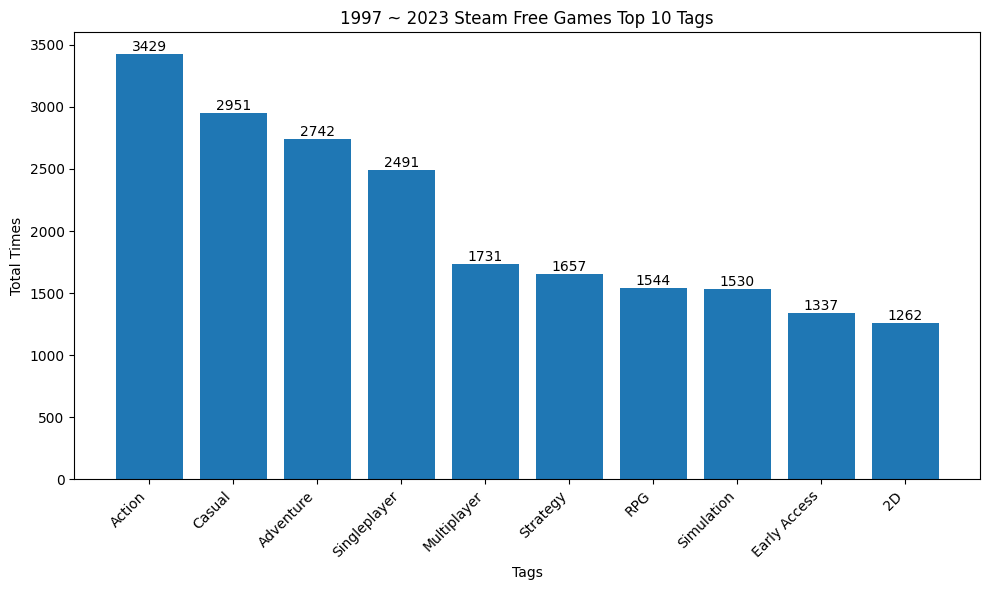

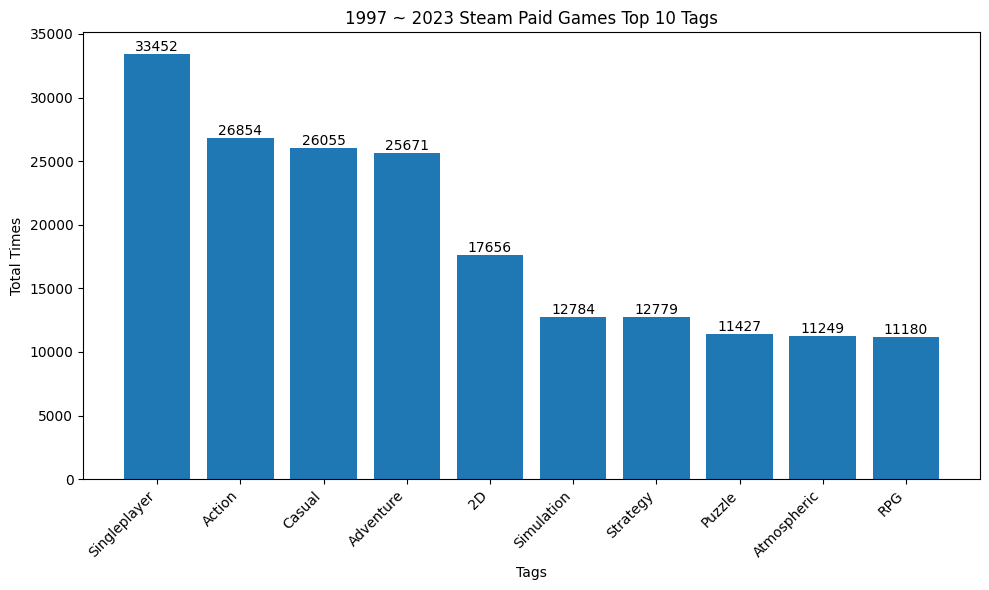

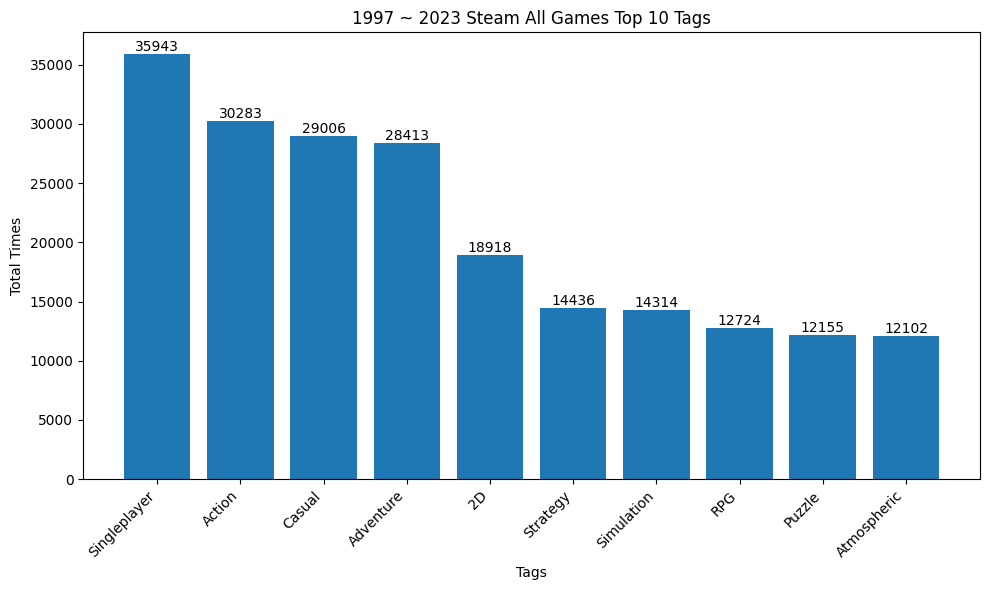

In [ ]:
import json
import collections
import matplotlib.pyplot as plt

# 讀取免費和付費遊戲的 JSON 檔案
with open('free_games.json', 'r', encoding='utf-8') as f:
    free_games = json.load(f)

with open('paid_games.json', 'r', encoding='utf-8') as f:
    paid_games = json.load(f)

# 分析遊戲標籤，排除 'Indie' 和 'Free to Play'
def analyze_tags(games):
    tag_counts = {}
    for game in games:
        for tag in game['tags']:
            if tag not in ['Indie', 'Free to Play']:  # 排除特定標籤
                if tag in tag_counts:
                    tag_counts[tag] += 1
                else:
                    tag_counts[tag] = 1
    sorted_tags = sorted(tag_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_tags

free_game_tags = analyze_tags(free_games)
paid_game_tags = analyze_tags(paid_games)

# 繪製免費遊戲標籤統計圖 (長條圖) - 前 10 個標籤
plt.figure(figsize=(10, 6))

# 取出前 10 個標籤和數量
tags, counts = zip(*free_game_tags[:10])

# 繪製長條圖
bars = plt.bar(tags, counts)

plt.xlabel('Tags')
plt.ylabel('Total Times')
plt.title('1997 ~ 2023 Steam Free Games Top 10 Tags')
plt.xticks(rotation=45, ha='right')

# 在每個長條上標示數值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.tight_layout()

plt.show()

# 繪製付費遊戲標籤統計圖 (長條圖) - 前 10 個標籤
plt.figure(figsize=(10, 6))

# 取出前 10 個標籤和數量
tags, counts = zip(*paid_game_tags[:10])

# 繪製長條圖
bars = plt.bar(tags, counts)

plt.xlabel('Tags')
plt.ylabel('Total Times')
plt.title('1997 ~ 2023 Steam Paid Games Top 10 Tags')
plt.xticks(rotation=45, ha='right')

# 在每個長條上標示數值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.tight_layout()

plt.show()

# 收集所有標籤，排除 'Indie' 和 'Free to Play'
all_tags = []
for game in free_games:
    all_tags.extend([tag for tag in game["tags"] if tag not in ['Indie', 'Free to Play']])
for game in paid_games:
    all_tags.extend([tag for tag in game["tags"] if tag not in ['Indie', 'Free to Play']])

# 計算標籤出現次數
tag_counts = collections.Counter(all_tags)

# 取得前 10 個標籤
top_10_tags = tag_counts.most_common(10)

# 繪製全遊戲 Top 10 標籤統計圖 (排除 Indie 和 Free to Play)
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_10_tags))
plt.xlabel('Tags')
plt.ylabel('Total Times')
plt.title('1997 ~ 2023 Steam All Games Top 10 Tags')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.tight_layout()

# 儲存圖表
plt.show()